# Index

[Deep Gravity](#Deep-Gravity)

[No Outliers](#No-Outliers)

[Outliers](#Outliers)

In [1]:
%%time
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib as mpl
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os

states=['New York','Massachusetts','California','Florida','Washington','Texas']

CPU times: user 1.09 s, sys: 667 ms, total: 1.75 s
Wall time: 1.09 s


### Plot settings

In [2]:
color_dict={'Gravity pow':(143, 194, 165),
            'Gravity exp':(102, 194, 165),
            'Radiation':(84, 164, 165),
            'BMS Best':(218, 141, 98),
            'BMS Plausible':(218, 141, 98),
            'BMS Ensemble':(249, 166, 98),
            'BMS Predictive':(255, 199, 98),
            'Random Forest':(141,160,203),
            'Deep Gravity':(220, 160, 203)
           }

In [3]:
df_C_final=pd.read_pickle('./data/checkpoints/df_C_2023_07_20-07_56_07.pkl')
name=open('./data/checkpoints/scatter_C_2023_07_20-07_56_07.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./data/checkpoints/error_C_2023_07_20-07_56_08.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

H 87.34528248715218 3 4 (0.001, 100000.0) 531.5034615585581
I 105.78292005334049 6 7 (0.001, 100000.0) 820.60783855048
J 94.94416403714297 3 4 (0.001, 100000.0) 820.5460103162227
K 64.16222672284341 3 4 (0.001, 100000.0) 529.8083120981986
L 123.5550267161762 6 7 (0.001, 100000.0) 1046.3861598589415
M 47.2797115056742 3 4 (0.001, 100000.0) 314.4017261386094
N 0.5969080387039825 6 7 (1e-05, 500.0) 2.252325098936346
O 0.5043319600575645 6 7 (1e-05, 500.0) 1.773352077533753
P 0.5345554646071299 5 6 (1e-05, 500.0) 1.71145938298216
Q 0.5311608496884365 3 4 (1e-05, 500.0) 1.7001350560279924
R 0.5689842822971308 6 7 (1e-05, 500.0) 1.8741997517913318
S 0.534310869063839 5 6 (1e-05, 500.0) 1.8306593828358781
T 0.6070192297979604 3 4 (-0.40881014955700595, 8.585693105627422) 2.085433174387222
U 0.5118020774009804 6 7 (-0.4088167612001168, 8.585693420467571) 2.084116147281162
V 0.5501791627382939 3 4 (-0.41304908438655125, 8.67439343468063) 2.026430150304677
W 0.5510437515905704 3 4 (-0.4130490843

New York Massachusetts California  Florida Washington  \
Metric   Model                                                                  
CPC      Gravity pow       0.545         0.412      0.538    0.548       0.43   
         Gravity exp       0.403         0.439      0.367    0.403      0.345   
         Radiation          0.43         0.556      0.492    0.482      0.455   
         BMS Plausible     0.551         0.544      0.026    0.533      0.588   
         BMS Ensemble      0.548         0.447        0.0    0.506      0.573   
         BMS Predictive    0.548         0.448        0.0    0.506      0.574   
         Random Forest     0.547         0.573      0.401    0.489      0.532   
         Deep Gravity      0.528         0.495      0.567    0.624      0.548   
AbsErr   Gravity pow     138.135        405.42    220.748  141.447    423.065   
         Gravity exp      150.11       462.597    298.928  178.304    459.965   
         Radiation       117.952       158.143    163.691    94.98    181.743   
         BMS Plausible    87.345       129.145     94.944   64.162    150.607   
         BMS Ensemble     92.037       129.399    100.663   67.566    153.518   
         BMS Predictive   91.926       129.899    100.922   67.694    153.703   
         Random Forest    92.059       105.783    102.838   68.671    123.555   
         Deep Gravity     89.483       129.293    141.101   75.972    143.069   
RE       Gravity pow       0.776         0.985      0.835    0.858      1.126   
         Gravity exp       0.812         0.994      0.935    0.926      1.088   
         Radiation         0.947          0.86      0.948     0.94      0.921   
         BMS Plausible     0.605         0.546      0.541    0.531      0.598   
         BMS Ensemble      0.612         0.568      0.535     0.54      0.605   
         BMS Predictive    0.612          0.57      0.535     0.54      0.605   
         Random Forest     0.597         0.504      0.566    0.552      0.569   
         Deep Gravity      0.692         0.697      0.793     0.72       0.72   
LogRatio Gravity pow       0.942         1.234      0.994     1.12      1.162   
         Gravity exp       1.004         1.314      1.239    1.321      1.309   
         Radiation         2.575         1.598      2.552    2.397      2.078   
         BMS Plausible     0.607          0.56       0.55    0.551       0.62   
         BMS Ensemble       0.62          0.57      0.555    0.568      0.618   
         BMS Predictive    0.618         0.569      0.555    0.567       0.62   
         Random Forest     0.608         0.512      0.588    0.568       0.59   
         Deep Gravity      1.006         1.093      1.413    1.113      0.991   

                          Texas  
Metric   Model                   
CPC      Gravity pow      0.469  
         Gravity exp      0.297  
         Radiation        0.471  
         BMS Plausible    0.524  
         BMS Ensemble     0.489  
         BMS Predictive   0.489  
         Random Forest    0.486  
         Deep Gravity      0.45  
AbsErr   Gravity pow     83.991  
         Gravity exp     91.784  
         Radiation       79.395  
         BMS Plausible    47.28  
         BMS Ensemble    48.914  
         BMS Predictive  48.915  
         Random Forest   52.184  
         Deep Gravity     75.79  
RE       Gravity pow      0.866  
         Gravity exp      0.882  
         Radiation        0.976  
         BMS Plausible    0.553  
         BMS Ensemble     0.534  
         BMS Predictive   0.534  
         Random Forest    0.547  
         Deep Gravity     0.962  
LogRatio Gravity pow      1.289  
         Gravity exp      1.373  
         Radiation         3.04  
         BMS Plausible    0.552  
         BMS Ensemble     0.546  
         BMS Predictive   0.545  
         Random Forest     0.55  
         Deep Gravity     2.888

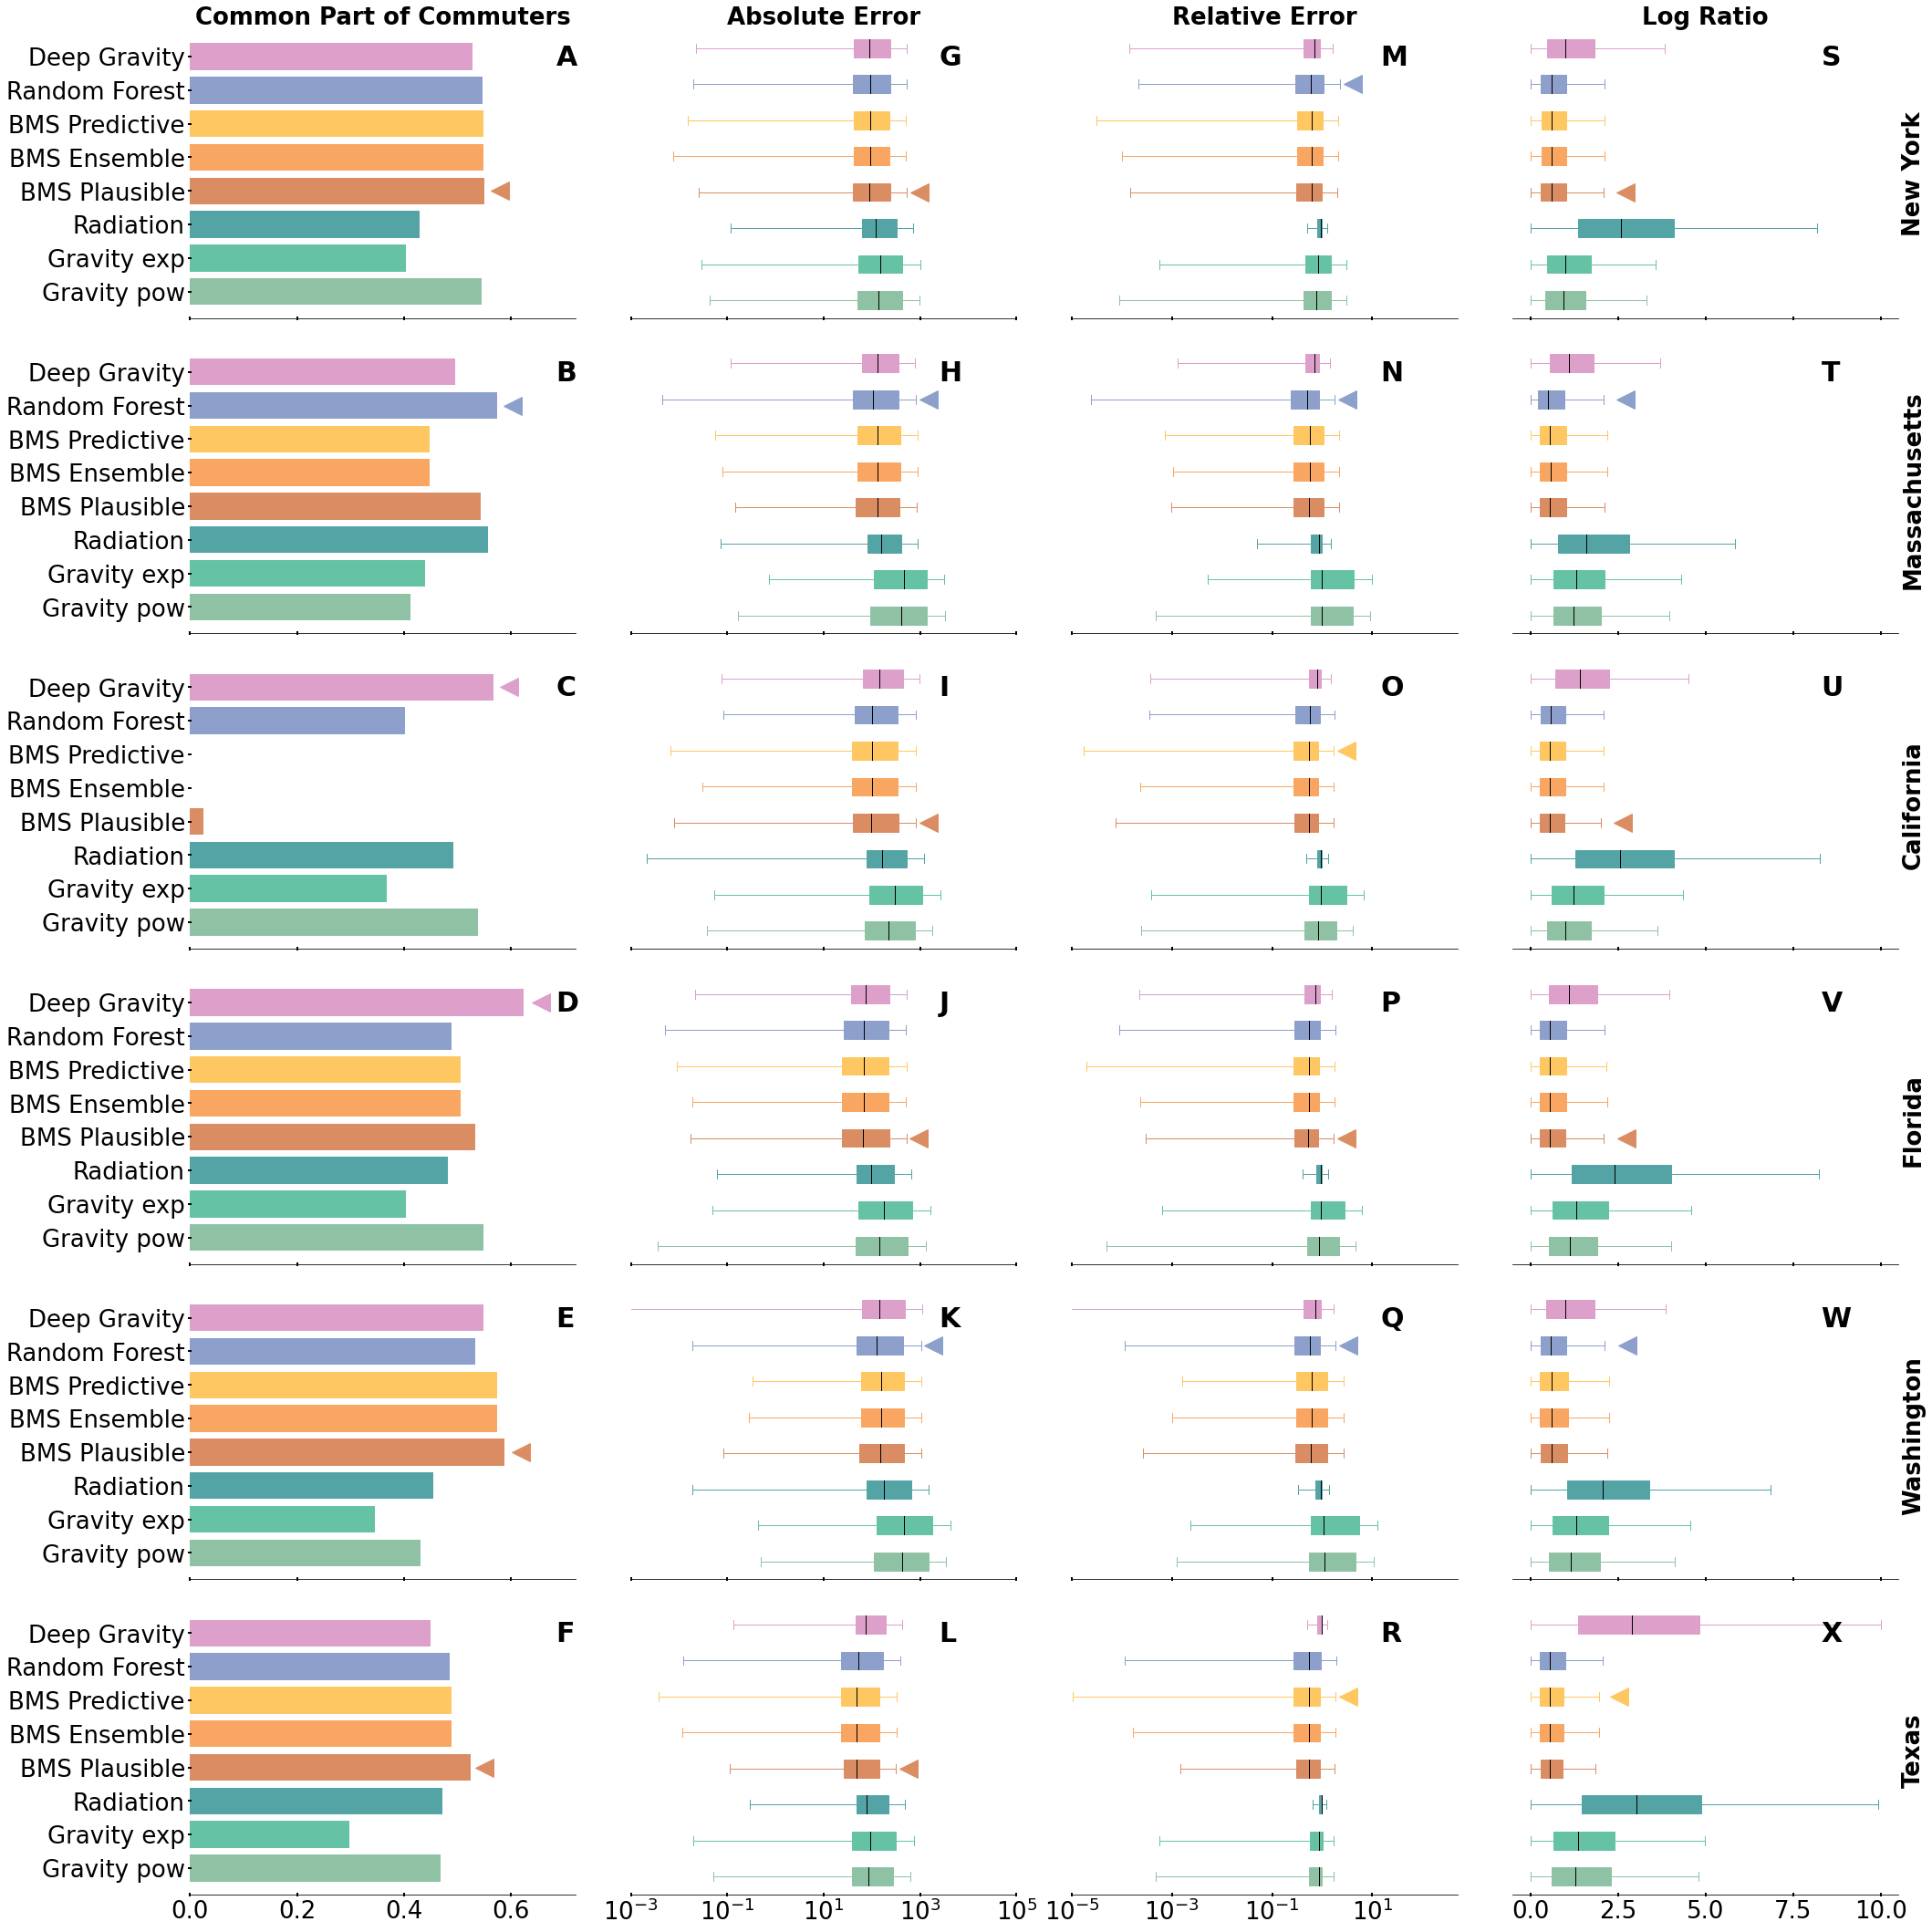

In [4]:
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,df,metric,model,state,size=(30, 30),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    mi=pd.MultiIndex.from_product([metric, model],
                           names=['Metric', 'Model'])
    results_to_table=pd.DataFrame(index=mi,columns=state)
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        for j,s in enumerate(state):
            # Get de value for each model
            #print(m)
            if m=='CPC':
                x=[]
                for mdl in model:
                    try:
                        #cutoff
                    #    if float(df.loc[(mdl,m)][s])<1e5:
                        x+=[float(df.loc[(mdl,m)][s])]
                    #    else:
                    #        x+=[6e4]
                    except:
                        x+=[0.]
                    results_to_table.at[(m,mdl), s] = round(x[-1],3)
                # Adding bar plot to final subplot
                ind = np.arange(len(model))
                axs[j,i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
                if j==0 and m=='CPC':
                    axs[j,i].set_title('Common Part of Commuters', fontweight="bold")
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                axs[j,i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                axs[j,i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
                axs[j,i].set_xlim(right=0.72)
                c_count+=1
            else:
                x=[]
                for mod in model:
                    x.append(_dict[s][mod][m])
                box_dict=axs[j,i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
                for item in ['boxes', 'fliers']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color=color)
                for item in ['medians']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color='black')
                for item in ['means']:
                    for sub_item,color in zip(box_dict[item], colors):
                        sub_item.set_color('black')
                # whiskers and caps have to be treated separately since there are two of each for each plot
                for item in ['whiskers', 'caps']:
                    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                        plt.setp(sub_items, color=color)
                if i==len(metric)-1:
                    axs[j,i].set_ylabel(s, fontweight="bold")
                    axs[j,i].yaxis.set_label_position("right")
                    #axs[j,i].yaxis.tick_right()
                if j==0 and m=='RE':
                    axs[j,i].set_title('Relative Error', fontweight="bold")
                elif j==0 and m=='LogRatio':
                    axs[j,i].set_title('Log Ratio', fontweight="bold")
                elif j==0 and m=='AbsErr':
                    axs[j,i].set_title('Absolute Error', fontweight="bold")
                if i!=0:
                    axs[j,i].set_yticks([])
                ind = np.arange(len(model))+1
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                if m=='RE':
                    axs[j,i].set_xlim([1e-5,5e2])
                if m=='AbsErr':
                    axs[j,i].set_xlim([1e-3,1e5])
                    
                #    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #elif m=='LogRatio':
                #    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #else:
                axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                c_count+=1
                if m=='RE' or m=='AbsErr':
                    axs[j,i].set_xscale('log')
                high_median=1e10
                high_model=0
                for k,mod in enumerate(model):
                    #print([k.get_xdata() for k in box_dict['caps']])
                    #print(box_dict)
                    results_to_table.at[(m,mod), s] = round(box_dict['medians'][k].get_xdata()[0],3)
                    if box_dict['medians'][k].get_xdata()[0]<high_median:
                        high_median=box_dict['medians'][k].get_xdata()[0]
                        high_model=k
                        high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                        high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                        x_lims=axs[j,i].get_xlim()
                print(chars[c_count],high_median,high_model,high_model_y,x_lims,high_model_caps)
                #axs[j,i].plot(high_model_caps +0.05*high_model_caps,high_model_y, marker="^",transform=axs[j,i].get_yaxis_transform(),color=colors[high_model], markersize=20)
                if m=='RE' or m=='AbsErr':
                    x_marker=high_model_caps +0.8*high_model_caps
                else:
                    x_marker=high_model_caps +0.3*high_model_caps
                axs[j,i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
    display(results_to_table)
    #print(results_to_table.to_latex())
    plt.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    
    #return fig
#p.metrics_model_state_h(df_C_final,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],states,name='./Plots/week1_fig_3_boxplot.pdf')

C 87.34528248715218 3 4 (0.001, 100000.0) 531.5034615585581
D 0.5969080387039825 6 7 (1e-05, 500.0) 2.252325098936346
E 0.6070192297979604 3 4 (-0.40881014955700595, 8.585693105627422) 2.085433174387222


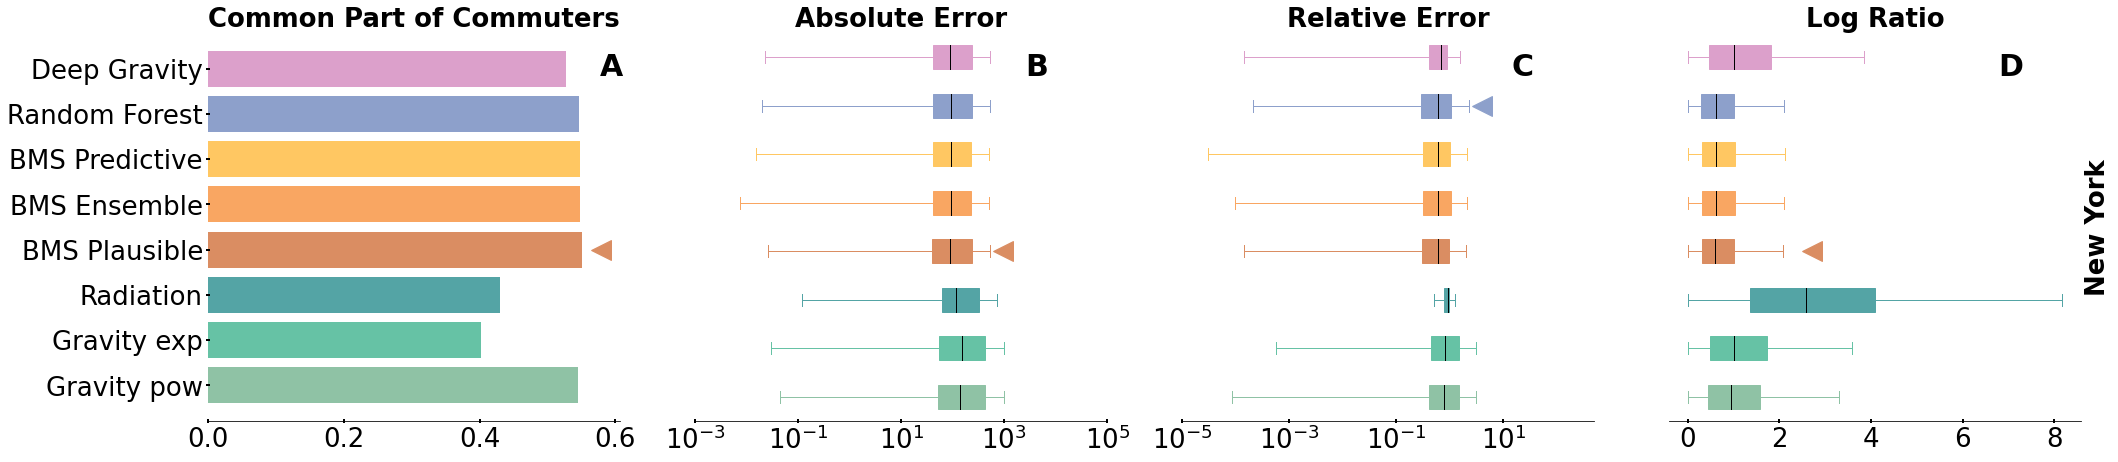

In [5]:
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,df,metric,model,state,size=(30, 7),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        #for j,s in enumerate(state):
        # Get de value for each model
        #print(m)
        if m=='CPC':
            x=[]
            for mdl in model:
                try:
                    #cutoff
                #    if float(df.loc[(mdl,m)][s])<1e5:
                    x+=[float(df.loc[(mdl,m)][state[0]])]
                #    else:
                #        x+=[6e4]
                except:
                    x+=[0.]
            # Adding bar plot to final subplot
            ind = np.arange(len(model))
            axs[i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
            if m=='CPC':
                axs[i].set_title('Common Part of Commuters', fontweight="bold")
            if i==0: axs[i].set_yticks(ind, labels=model)
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            axs[i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            axs[i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
            c_count+=1
        else:
            x=[]
            for mod in model:
                x.append(_dict[state[0]][mod][m])
            box_dict=axs[i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
            for item in ['boxes', 'fliers']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color=color)
            for item in ['medians']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color='black')
            for item in ['means']:
                for sub_item,color in zip(box_dict[item], colors):
                    sub_item.set_color('black')
            # whiskers and caps have to be treated separately since there are two of each for each plot
            for item in ['whiskers', 'caps']:
                for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                    plt.setp(sub_items, color=color)
            if i==len(metric)-1:
                axs[i].set_ylabel(state[0], fontweight="bold")
                axs[i].yaxis.set_label_position("right")
                #axs[j,i].yaxis.tick_right()
            if m=='RE':
                axs[i].set_title('Relative Error', fontweight="bold")
            elif m=='LogRatio':
                axs[i].set_title('Log Ratio', fontweight="bold")
            elif m=='AbsErr':
                axs[i].set_title('Absolute Error', fontweight="bold")
            if i!=0:
                axs[i].set_yticks([])
            ind = np.arange(len(model))+1
            if i==0: axs[j,i].set_yticks(ind, labels=model)
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            if m=='RE':
                axs[i].set_xlim([1e-5,5e2])
            if m=='AbsErr':
                axs[i].set_xlim([1e-3,1e5])

            #    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
            #elif m=='LogRatio':
            #    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
            #else:
            axs[i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            c_count+=1
            if m=='RE' or m=='AbsErr':
                axs[i].set_xscale('log')
            high_median=1e10
            high_model=0
            for k,mod in enumerate(model):
                #print([k.get_xdata() for k in box_dict['caps']])
                #print(box_dict)
                if box_dict['medians'][k].get_xdata()[0]<high_median:
                    high_median=box_dict['medians'][k].get_xdata()[0]
                    high_model=k
                    high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                    high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                    x_lims=axs[i].get_xlim()
            print(chars[c_count],high_median,high_model,high_model_y,x_lims,high_model_caps)
            #axs[j,i].plot(high_model_caps +0.05*high_model_caps,high_model_y, marker="^",transform=axs[j,i].get_yaxis_transform(),color=colors[high_model], markersize=20)
            if m=='RE' or m=='AbsErr':
                x_marker=high_model_caps +0.8*high_model_caps
            else:
                x_marker=high_model_caps +0.3*high_model_caps
            axs[i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
                
    plt.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='svg')
    fig.show()
    
    #return fig
#p.metrics_model_state_h(df_C_final,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
#metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],states,name='./Plots/fig_3_boxplot.pdf')
metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],['New York'],name='./Plots/fig_3_boxplotPNG.svg')

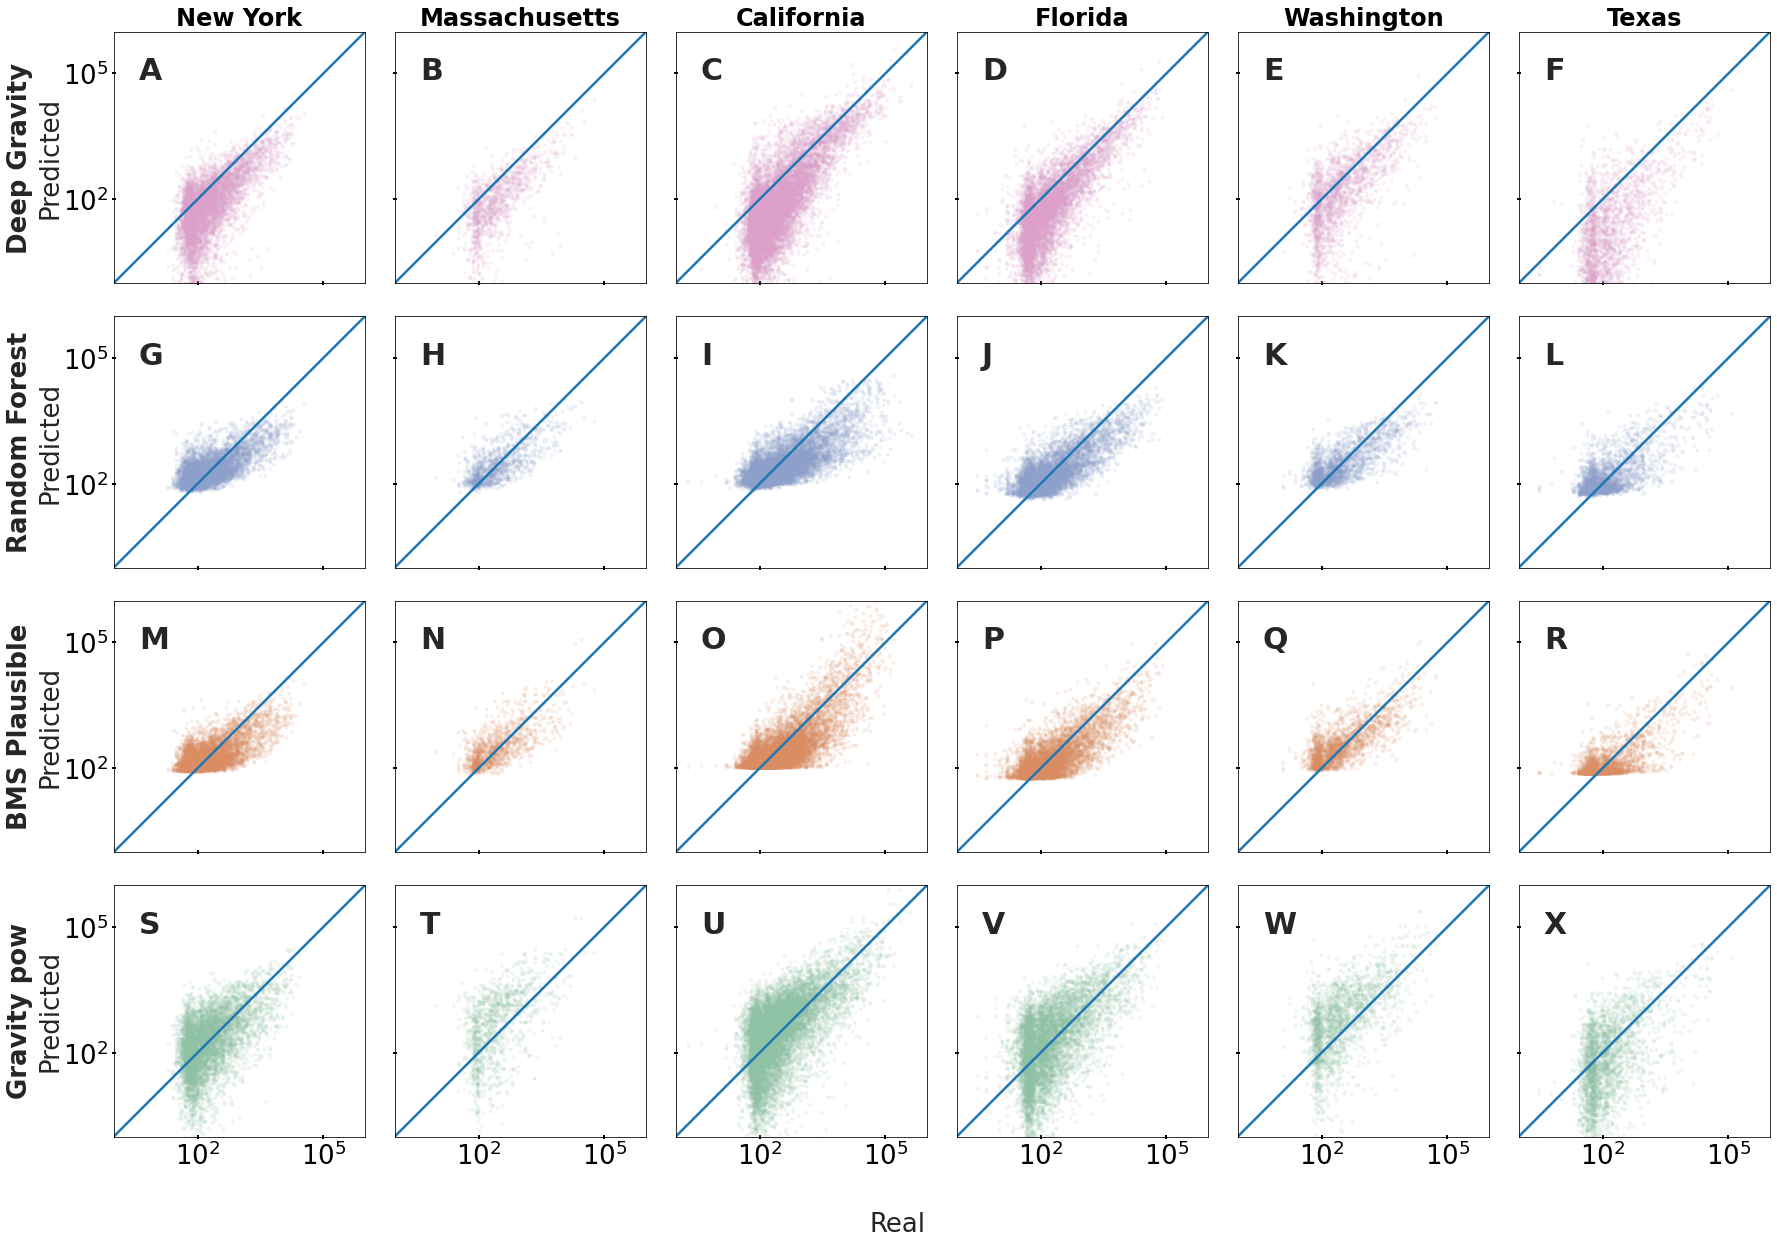

In [6]:
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
#plt.rc('text', usetex=True)
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    #sbrn.set(style='ticks', font_scale=2)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    #sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(4,6)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            #if j==0: axs[i,j].set_ylabel(r'$\bf{'+m.replace(' ','\,')+'}$\nPredicted')#, fontweight="bold")
            #if j==0: axs[i,j].set_ylabel(r'\nPredicted')#, fontweight="bold")
            if j==0:
                left, width = .25, .5
                bottom, height = .25, .5
                right = left + width
                top = bottom + height
                p = plt.Rectangle((left, bottom), width, height, fill=False)
                p.set_transform( axs[i,j].transAxes)
                p.set_clip_on(False)
                axs[i,j].add_patch(p)
                axs[i,j].text(-0.32, 0.5 * (bottom + top),m, horizontalalignment='right',
                              verticalalignment='center',rotation='vertical', 
                              size=26, transform=axs[i,j].transAxes, weight='bold')
                axs[i,j].text(-0.2, 0.5 * (bottom + top),'Predicted',horizontalalignment='right',
                              verticalalignment='center',rotation='vertical', 
                              size=26, transform=axs[i,j].transAxes)
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].text(.1, .9,chars[c_count], ha='left', va='top',size=30, transform=axs[i,j].transAxes, weight='bold')
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','BMS Plausible','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_fig_2_scatter_plot.pdf')

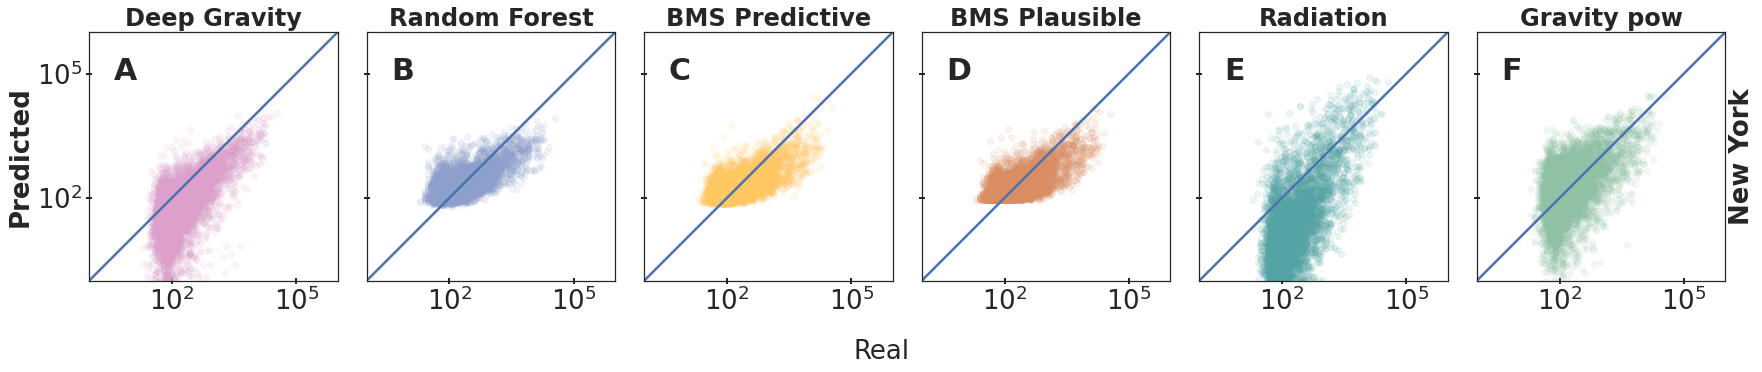

In [7]:
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    sbrn.set(style='ticks', font_scale=2)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    #sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(1,len(models),figsize=(25,5))#,sharey='col',sharex='col')
    plt.rc('font', family='Arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(1,6)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        #for j,state in enumerate(_dict.keys()):
        t='test'
        if m=='Deep Gravity':
            t='testDG'
        axs[i].scatter(_dict['New York'][t], _dict['New York'][m],label=m, alpha=0.1,c=[colors[i]])#bar_label(deepcopy(p1), label_type=None)
        #if j==0: axs[i].set_ylabel(, fontweight="bold")
        if i==0:
            axs[i].set_ylabel('Predicted', fontweight="bold")
        if i==len(models)-1:
            axs[i].set_ylabel('New York', fontweight="bold")
            axs[i].yaxis.set_label_position("right")
        axs[i].set_title(m, fontweight="bold")
        axs[i].tick_params(direction='inout', width=2)

        axs[i].set_yscale('log')
        axs[i].set_xscale('log')
        ratio = 1.0
        alpha=alpha-0.1
    #fig.legend(loc=5)
        xleft, xright = axs[i].get_xlim()
        ybottom, ytop = axs[i].get_ylim()
        minimum = np.min((axs[i].get_xlim(),axs[i].get_ylim()))
        maximum = np.max((axs[i].get_xlim(),axs[i].get_ylim()))
    #ax.set_xlim(minimum*1.2,maximum*1.2)
    #ax.set_ylim(minimum*1.2,maximum*1.2)
    #axs.plot((xleft, xright), (ybottom,ytop))
        axs[i].plot(lims, lims,lw=2.5)
        axs[i].tick_params(axis = 'both')
        #axs[i,j].xticks([])
        if list_ticks!=None:
            axs[i].set_xticks(list_ticks)
            axs[i].set_yticks(list_ticks)
        if i>0: axs[i].set_yticklabels([])
        #if i<len(models)-1: axs[i].set_xticklabels([])
        axs[i].set_xlim(lims)
        axs[i].set_ylim(lims)
        axs[i].text(.1, .9,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
        axs[i].set(adjustable='box', aspect='equal')
        c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='svg')
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Radiation','BMS Plausible','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_fig_2_scatter_plotPNG.svg')

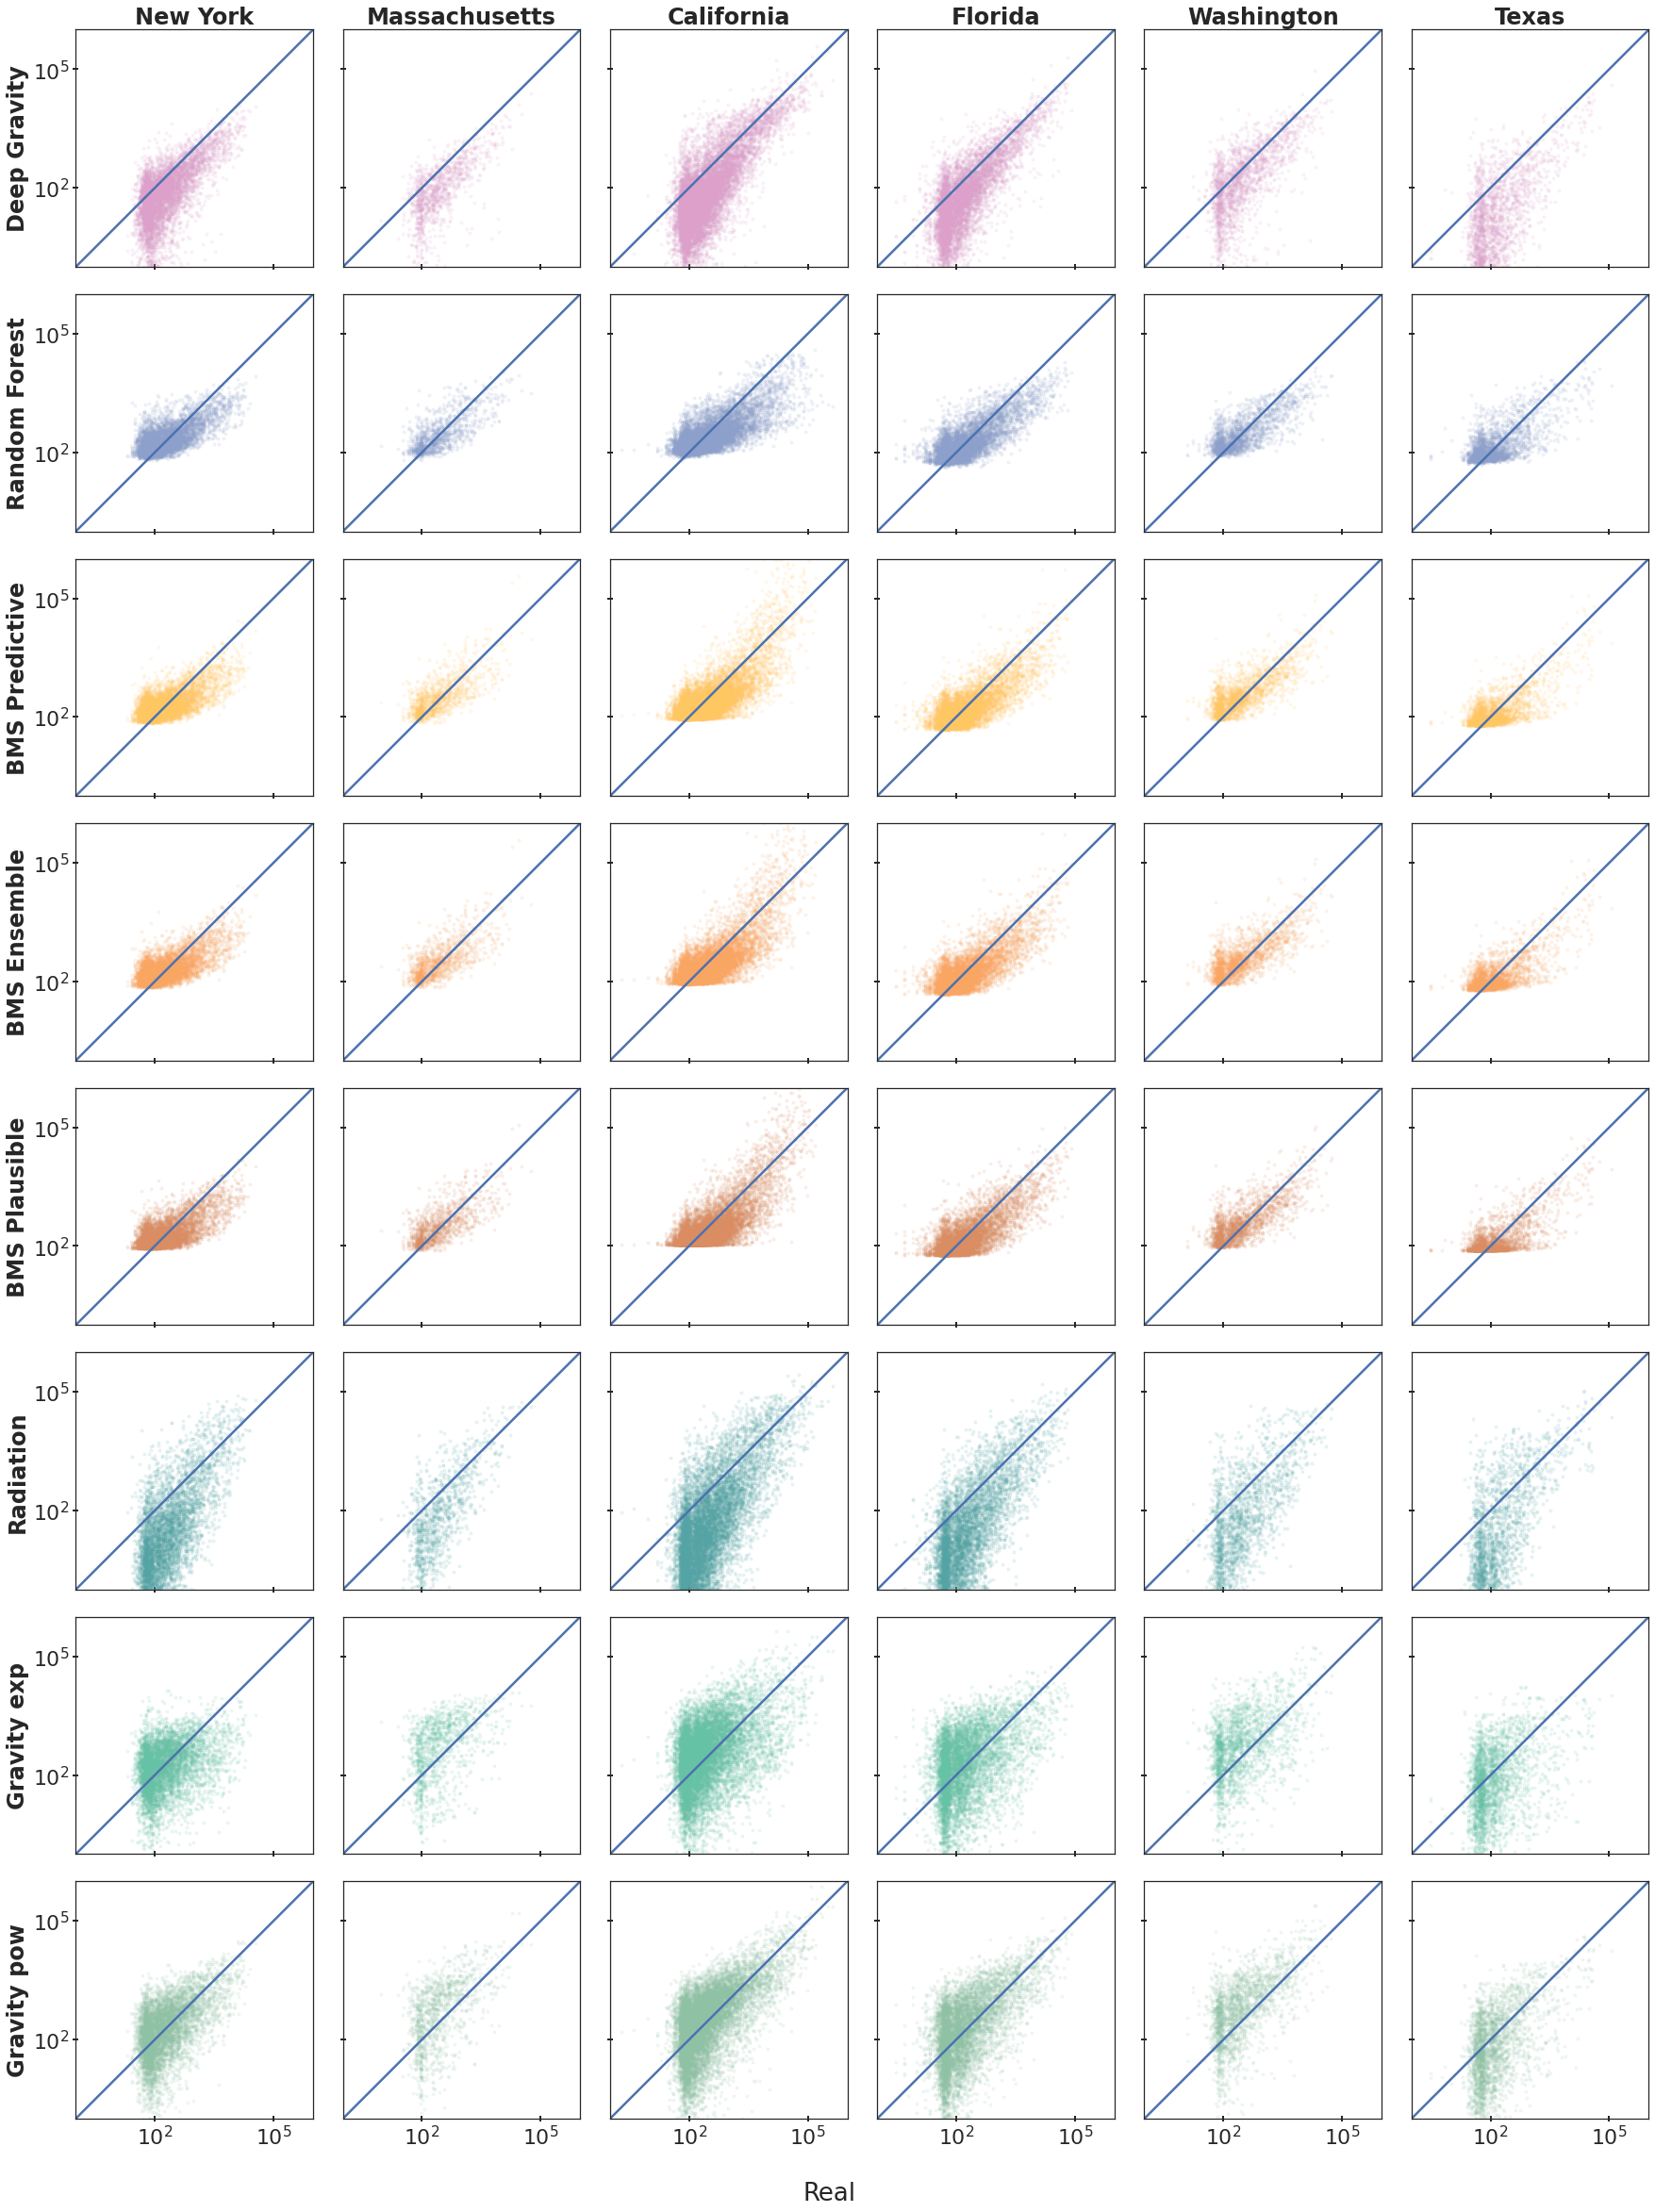

In [8]:
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,33))#,sharey='col',sharex='col')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,8)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_SI_scatter_plot.pdf')

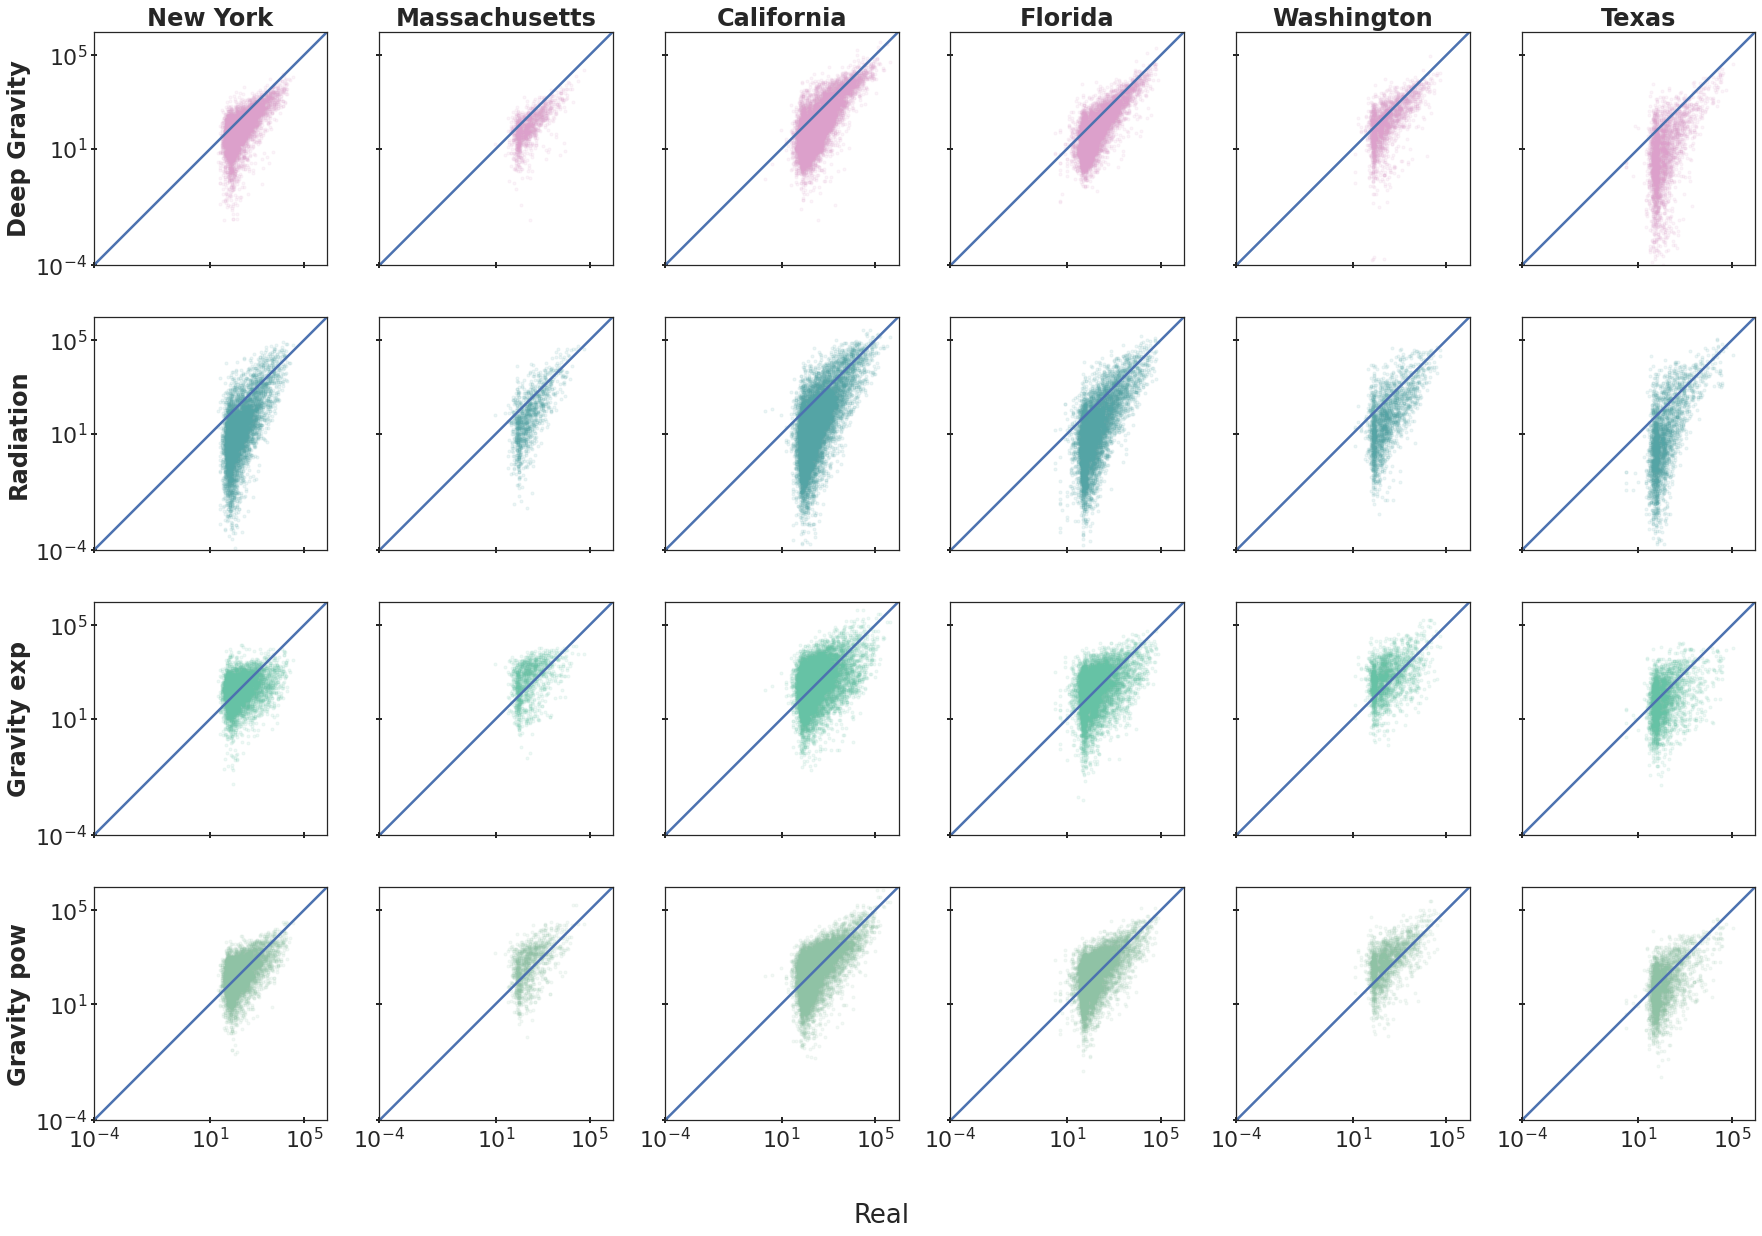

In [9]:
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,4)
    g.update(wspace=0.3, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    #if name!=None:
        #fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Gravity exp','Radiation','Deep Gravity'],
                 lims=(1e-4,1e6),list_ticks=[1e-4,1e1,1e5],name='./Plots/week1_SI_full_range.pdf')

# Power law interpretation

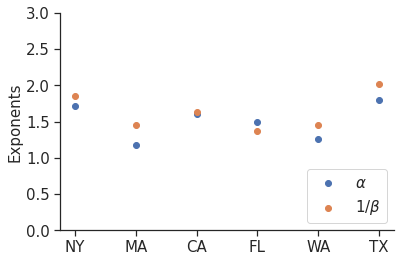

In [10]:
#alphas=[1.72*0.97, 1.174*1.775, 1.602*2.019, 1.489*1.325, 1.255*1.413, 1.8*1.158]
alphas=[1.72, 1.174, 1.602, 1.489, 1.255, 1.8]
_1_beta=[1./0.54, 1./0.6875, 1./0.6113, 1./0.7271,1./0.6888, 1./0.4955]

states=['New York','Massachusetts','California','Florida','Washington','Texas']

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#sbrn.set(style='ticks', font_scale=2)


x=[0,1,2,3,4,5]
plt.xticks(x,['NY','MA','CA','FL','WA','TX'])
plt.ylabel('Exponents')
plt.scatter(x, alphas, label=r'$\alpha$')
plt.scatter(x, _1_beta,label=r'$1/\beta$')
plt.ylim([0,3])
plt.legend(loc='lower right')

ax = plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
#plt.text(.9, .9,'C', ha='left', va='top',size=30, transform=ax.transAxes, weight='bold')
#plt.savefig('./Plots/alpha_beta.pdf',format='pdf',bbox_inches='tight',dpi=300)
plt.show()